In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Definições úteis.

A função abaixo gera amostras de uma função ruidosa criada a partir da seguinte função objetivo (i.e., o mapeamento verdadeiro)
$$y = 2 + x_1 + 0.5 x_1^2$$

In [2]:
# Função que cria o modelo gerador (target function).
def target_function(N, x1, seed):
    # Reset the PN sequence generator.
    np.random.seed(seed)
    # Polinômio de grau 2.
    y = 2 + x1 + 0.5*x1**2
    y_noisy = y + np.random.randn(N, 1)
    return y, y_noisy

### Erro de Variância

O **erro de variância** é uma medida que mostra o quanto um modelo (i.e., função hipótese) muda se conjuntos de treinamento diferentes forem usados.

Para este exemplo:

+ Gera-se 30 amostras do mapeamento verdadeiro.
+ Utiliza-se polinômios de ordem 30.
+ Usa-se sementes diferentes para re-inicializar o gerador de sequências pseudo-aleatórias em pontos diferentes, garantindo assim, conjuntos de treinamento diferentes.

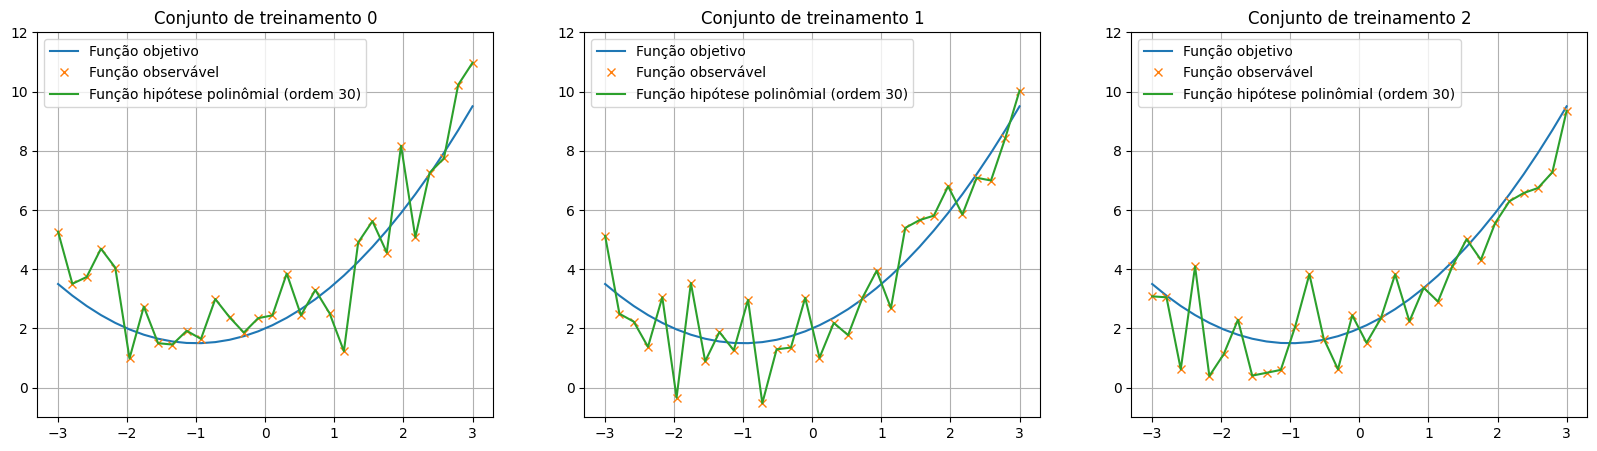

In [3]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure(figsize=(20,5))

for i in range(3):

    ax = plt.subplot(1, 3, i+1)
    # Create target function.
    y, y_noisy = target_function(N, x1, i)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=30, include_bias=False)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)

    y_pred = reg.predict(x1)

    plt.title('Conjunto de treinamento '+str(i))
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_noisy, 'x', label='Função observável')
    plt.plot(x1, y_pred, label='Função hipótese polinômial (ordem 30)')
    plt.legend()
    plt.ylim([-1, 12])
    plt.grid()

+ Percebam que o modelo (i.e., a função hipótese) **varia**, ou seja, assume formatos diferentes, de acordo com o conjunto de treinamento.

A figura abaixo apresenta o mesmo exemplo acima, mas com mais conjuntos de treinamento.

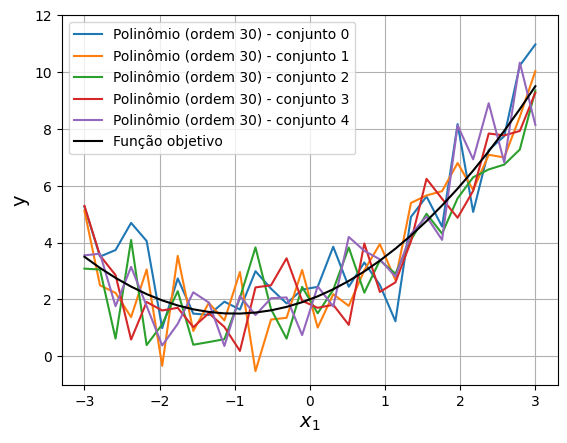

In [4]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure()

for i in range(5):

    # Create target function.
    y, y_noisy = target_function(N, x1, i)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=30, include_bias=False)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)

    y_pred = reg.predict(x1)
    plt.plot(x1, y_pred, label='Polinômio (ordem 30) - conjunto '+str(i))

plt.plot(x1, y, 'k', label='Função objetivo')

plt.legend()
plt.ylim([-1, 12])
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()

#### Conclusões

+ As funções hipóteses se **ajustam muito bem aos diferentes conjuntos de treinamento** (**sobreajuste**).


+ No entanto, se considerarmos a esperança **ao longo das amostras** de diferentes conjuntos de treinamento, a média das hipóteses se ajustaria perfeitamente à função verdadeira (dado que o ruído esteja centrado em 0).
    + Aqui, média se refere à **esperança ao longo das amostras de diferentes conjuntos de treinamento** e não à **esperança dos exemplos de um dado conjunto de treinamento**.

+ Portanto, como vemos na figura acima, a variância é alta, pois na média, uma predição, $\hat{y}$, difere muito do valor da média das predições, $E[\hat{y}]$.
    + Variância mede o quanto uma variável aleatória varia em relação à sua média.

$$\text{var} = E[(E[\hat{y}] - \hat{y})^2]$$


**Como reduzir a variância?**

+ Aumentando o conjunto de treinamento.


+ Reduzindo o número de graus de liberdade (i.e., complexidade) do modelo.

### Erro de Viés

O **erro de viés** (ou bias) é uma medida que mostra o quanto um **modelo consegue capturar do comportamento do modelo gerador**.

+ Gera-se 30 amostras do mapeamento verdadeiro.
+ Utiliza-se sempre polinômios de ordem 1.
+ Usa-se sementes diferentes para re-inicializar o gerador de sequências pseudo-aleatórias em pontos diferentes, garantindo assim, conjuntos de treinamento diferentes.

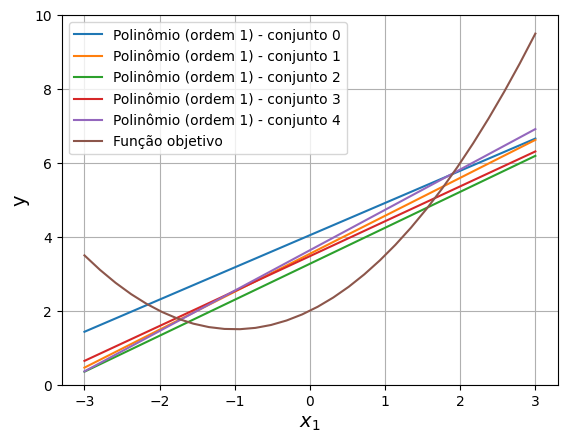

In [5]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure()

for i in range(5):

    # Create target function.
    y, y_noisy = target_function(N, x1, i)

    # Instantiate a first order polynomial.
    poly = PolynomialFeatures(degree=1, include_bias=False)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression fit (training).
    reg.fit(x1, y_noisy)
    # Prediction.
    y_pred = reg.predict(x1)
    # Plot prediction.
    plt.plot(x1, y_pred, label='Polinômio (ordem 1) - conjunto '+str(i))

plt.plot(x1, y, label='Função objetivo')
plt.legend()
plt.ylim([0, 10])
plt.grid()
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

#### Conclusões

+ Nenhuma das funções hipótese se aproxima bem da função verdadeira, exceto em dois pontos (em torno de x=-2 e x=1.8).


+ A **suposição** (ou seja, o viés) de que o modelo gerador pode ser aproximado por uma reta faz com que o modelo não capture a curvatura do modelo gerador.


+ O viés é alto porque a diferença entre o valor verdadeiro, $y$, e a média do valor predito, $E[\hat{y}]$, é grande.
    + Aqui, média se refere à **esperança ao longo de diferentes amostras de conjuntos de treinamento** e não à **esperança dos exemplos de um dado conjunto de treinamento**.

$$\text{Viés} = E[\hat{y}] - y$$


+ Portanto, não importa o quão bem ajustado aos dados o modelo esteja (i.e., conjunto infinito de amostras), ele nunca irá capturar a curvatura da função objetivo.


**Como reduzir o viés?**

+ Só existe uma forma, **aumentando o número de graus de liberdade do modelo** (i.e., sua flexibilidade).


+ Mesmo que o conjunto de treinamento contivesse **infinitos exemplos**, **devido à suposição errada** sobre a complexidade do modelo gerador, **não seria possível obter-se uma boa aproximação**.

# Observações finais

### 1. Um modelo com baixíssimo erro de viés pode ser flexível demais e sobreajustar.

### 2. Por outro lado, um modelo com baixíssimo erro de variância pode não ser flexível o suficiente e subajustar.

## Portanto, é necessário que se encontre uma relação de compromisso entre os erros de viés e de variância de um modelo.

### Referências

[1] 'bias_variance_decomp: Bias-variance decomposition for classification and regression losses', http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

[2] 'The Bias-Variance Tradeoff in Statistical Machine Learning - The Regression Setting', https://www.quantstart.com/articles/The-Bias-Variance-Tradeoff-in-Statistical-Machine-Learning-The-Regression-Setting/

[3] 'Sketch of bias, variance, training, test and Bayes errors', https://botlnec.github.io/islp/sols/chapter2/exercise3/